In [1]:
import torch
import numpy as np 

## linear regression example

In [3]:



x = torch.tensor([1,2,3,4,4,5,6,6,7], dtype = torch.float32)
y = torch.tensor([2,4,6,7,9,10,11,12,15], dtype = torch.float32)

w = torch.tensor(0.0, dtype = torch.float32 , requires_grad = True)


learning_rate = 0.001
epochs = 100
for i in range(epochs):
    y_predict = w * x

    loss = ((y - y_predict)**2).mean()
    

    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad

    w.grad.zero_()

    print (f'at epoch:{i} , w = {w} , loss = {loss}')

print(f'prediction f(8): {w * 8}')    

at epoch:0 , w = 0.0855555608868599 , loss = 86.22222137451172
at epoch:1 , w = 0.16746073961257935 , loss = 79.05862426757812
at epoch:2 , w = 0.24587130546569824 , loss = 72.49327850341797
at epoch:3 , w = 0.3209363520145416 , loss = 66.47622680664062
at epoch:4 , w = 0.39279863238334656 , loss = 60.961669921875
at epoch:5 , w = 0.4615947902202606 , loss = 55.90765380859375
at epoch:6 , w = 0.5274556279182434 , loss = 51.27571487426758
at epoch:7 , w = 0.5905064344406128 , loss = 47.03059768676758
at epoch:8 , w = 0.6508670449256897 , loss = 43.14000701904297
at epoch:9 , w = 0.7086522579193115 , loss = 39.57432556152344
at epoch:10 , w = 0.7639719843864441 , loss = 36.306427001953125
at epoch:11 , w = 0.816931426525116 , loss = 33.311439514160156
at epoch:12 , w = 0.8676312565803528 , loss = 30.566572189331055
at epoch:13 , w = 0.9161678552627563 , loss = 28.05093765258789
at epoch:14 , w = 0.9626336097717285 , loss = 25.745391845703125
at epoch:15 , w = 1.0071167945861816 , loss = 

/home/omar/Desktop/simulator-linux/sim-3.9/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


## Linear regression using nn

In [4]:

from torch import nn

X = torch.tensor([[1],[2],[3],[4],[4],[5],[6],[6],[7]], dtype = torch.float32)
Y = torch.tensor([[2],[4],[6],[7],[9],[10],[11],[12],[15]], dtype = torch.float32)




In [5]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)
    
n_input ,  n_features  = X.shape  
n_output , n_target = Y.shape   

model = LinearRegression(n_features , n_target)

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0001)

for epoch in range(epochs):

    Y_predict = model(X)

    l = loss(Y , Y_predict)

    l.backward()

    optimizer.step()

    optimizer.zero_grad()

    w , b = model.parameters()

    print (f'at epoch:{epoch} , w = {w[0].item()} , b = {b[0].item()}, loss = {l}')

print(f'prediction f(8): {w * 8 + b}') 
    
   

at epoch:0 , w = -0.8683508038520813 , b = 0.3593282699584961, loss = 183.92538452148438
at epoch:1 , w = -0.7487799525260925 , b = 0.38283124566078186, loss = 168.02609252929688
at epoch:2 , w = -0.634509265422821 , b = 0.4052774906158447, loss = 153.5058135986328
at epoch:3 , w = -0.5253036618232727 , b = 0.4267139136791229, loss = 140.2449188232422
at epoch:4 , w = -0.42093849182128906 , b = 0.4471852779388428, loss = 128.13418579101562
at epoch:5 , w = -0.32119911909103394 , b = 0.466734379529953, loss = 117.07382202148438
at epoch:6 , w = -0.22588036954402924 , b = 0.4854021370410919, loss = 106.9728012084961
at epoch:7 , w = -0.1347861886024475 , b = 0.5032276511192322, loss = 97.74784088134766
at epoch:8 , w = -0.04772922396659851 , b = 0.520248293876648, loss = 89.32301330566406
at epoch:9 , w = 0.03546958044171333 , b = 0.5364997386932373, loss = 81.62887573242188
at epoch:10 , w = 0.11498132348060608 , b = 0.5520160794258118, loss = 74.60208129882812
at epoch:11 , w = 0.19096

# MNIST demo project

In [6]:
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Hyperparameters

input_size = 28*28
output_size = 10 
epochs = 2
learning_rate = 0.001 
batch_size = 100
hidden_size = 500

train_dataset = torchvision.datasets.MNIST(root = './MNIST_data' , train = True , transform = transforms.ToTensor(), download = True)
test_dataset = torchvision.datasets.MNIST(root = './MNIST_data' , train = False , transform = transforms.ToTensor(), download = True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size , shuffle=True )
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size , shuffle=True )





In [27]:

examples = iter(train_loader)



image , target = next(examples)

print(device)


# play with image and target


cpu


In [25]:
target.shape

torch.Size([100])

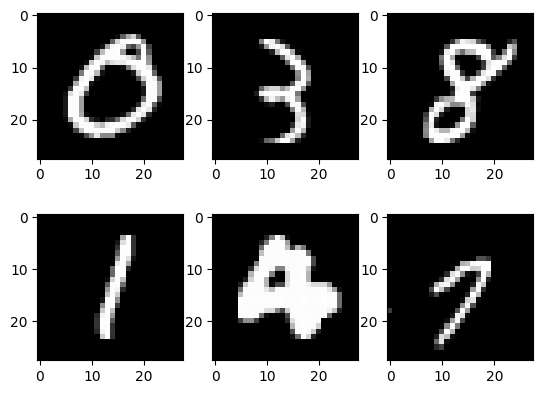

In [21]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(image[i][0] , cmap='gray')

In [30]:
class NeuralNet(nn.Module):
    def __init__(self , input_size , hidden_size , output_size):
        super(NeuralNet , self).__init__()
        self.linear1 = nn.Linear(input_size , hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size , output_size)

    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        return out
    

input_size = 784
hidden_size = 500
output_size = 10
learning_rate = 0.001
batch_size = 100
epochs = 2

    
model = NeuralNet(input_size , hidden_size , output_size).to(device)

loss = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters() , lr = learning_rate)

for epoch in range(epochs):

    for i  , (image_batch , labels) in enumerate(train_loader):
        image_batch  = image_batch.reshape(-1,28*28)

        y_predict = model(image_batch)

        l = loss(y_predict , labels)

        l.backward()

        optimizer.step()
        
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {epochs} , {i} , step {i+1} / {len(train_loader)} , loss = {l.item():.4f}')

        


epoch 1 / 2 , 99 , step 100 / 600 , loss = 0.3525
epoch 1 / 2 , 199 , step 200 / 600 , loss = 0.2348
epoch 1 / 2 , 299 , step 300 / 600 , loss = 0.1752
epoch 1 / 2 , 399 , step 400 / 600 , loss = 0.1516
epoch 1 / 2 , 499 , step 500 / 600 , loss = 0.1139
epoch 1 / 2 , 599 , step 600 / 600 , loss = 0.0635
epoch 2 / 2 , 99 , step 100 / 600 , loss = 0.2374
epoch 2 / 2 , 199 , step 200 / 600 , loss = 0.2869
epoch 2 / 2 , 299 , step 300 / 600 , loss = 0.0824
epoch 2 / 2 , 399 , step 400 / 600 , loss = 0.0835
epoch 2 / 2 , 499 , step 500 / 600 , loss = 0.1191
epoch 2 / 2 , 599 , step 600 / 600 , loss = 0.1069


In [43]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0



    for images , labels in test_loader:
        images = images.reshape(-1,28*28)
        y_predict = model(images)

        _, predictions = torch.max(y_predict , 1)
        
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 96.78


## CNN

# Sim project

In [2]:
import pandas as pd

df = pd.read_csv(r'/home/omar/Desktop/simulator-linux/training_data/updated_driving_log.csv')
df.head()

#rename values in first column with 'img + index'





,center_2023_09_25_19_39_34_157.jpg,0,0.1,0.2,0.00008109559
0,center_2023_09_25_19_39_34_266.jpg,0.0,0.0,0.0,0.000079
1,center_2023_09_25_19_39_34_376.jpg,0.0,0.0,0.0,0.000078
2,center_2023_09_25_19_39_34_482.jpg,0.0,0.0,0.0,0.000079
3,center_2023_09_25_19_39_34_582.jpg,0.0,0.0,0.0,0.000078
4,center_2023_09_25_19_39_34_689.jpg,0.0,0.0,0.0,0.000079


editing image path

In [137]:
df.iloc[:,0] = df.iloc[:,0].str.replace('/home/omar/Desktop/simulator-linux/test_data/IMG/' , '')
df.tail()
df.to_csv(r'/home/omar/Desktop/simulator-linux/training_data/updated1_driving_log.csv' , index = False)


in case of classification problems, use ImageFolder

## classification pipeline

In [46]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder


#train and test data directory
data_dir = "/home/omar/Desktop/simulator-linux/training_data/"
test_data_dir = "/home/omar/Desktop/simulator-linux/test_data/"


#load the train and test data
dataset = ImageFolder(data_dir,transform = transforms.Compose([
    transforms.Resize((320,160)),transforms.ToTensor()
]))
test_dataset = ImageFolder(test_data_dir,transforms.Compose([
    transforms.Resize((320,160)),transforms.ToTensor()
]))

In [52]:
img, label = dataset[0]
print(img,label)

#output :
#torch.Size([3, 150, 150]) 0

tensor([[[0.4549, 0.4510, 0.4471,  ..., 0.1373, 0.0902, 0.0588],
         [0.4549, 0.4549, 0.4510,  ..., 0.1608, 0.0863, 0.0588],
         [0.4588, 0.4549, 0.4549,  ..., 0.1647, 0.1137, 0.0588],
         ...,
         [0.3647, 0.3098, 0.2980,  ..., 0.4784, 0.4588, 0.4157],
         [0.2863, 0.2706, 0.2980,  ..., 0.5294, 0.4392, 0.3843],
         [0.2157, 0.2706, 0.3098,  ..., 0.4902, 0.4902, 0.3412]],

        [[0.5686, 0.5647, 0.5608,  ..., 0.1529, 0.1098, 0.0784],
         [0.5686, 0.5686, 0.5647,  ..., 0.1765, 0.1020, 0.0784],
         [0.5725, 0.5686, 0.5686,  ..., 0.1804, 0.1294, 0.0784],
         ...,
         [0.3843, 0.3294, 0.3176,  ..., 0.4824, 0.4627, 0.4196],
         [0.3059, 0.2902, 0.3176,  ..., 0.5333, 0.4431, 0.3882],
         [0.2353, 0.2902, 0.3294,  ..., 0.4941, 0.4941, 0.3451]],

        [[0.7255, 0.7216, 0.7176,  ..., 0.0941, 0.0510, 0.0353],
         [0.7255, 0.7255, 0.7216,  ..., 0.1176, 0.0510, 0.0275],
         [0.7294, 0.7255, 0.7255,  ..., 0.1216, 0.0745, 0.

In [64]:
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

batch_size = 128
val_size = 448
train_size = len(dataset) - val_size 

train_data,val_data = random_split(dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")


Length of Train Data : 1024
Length of Validation Data : 448


In [65]:
#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2,shuffle=True ,num_workers = 4, pin_memory = True)

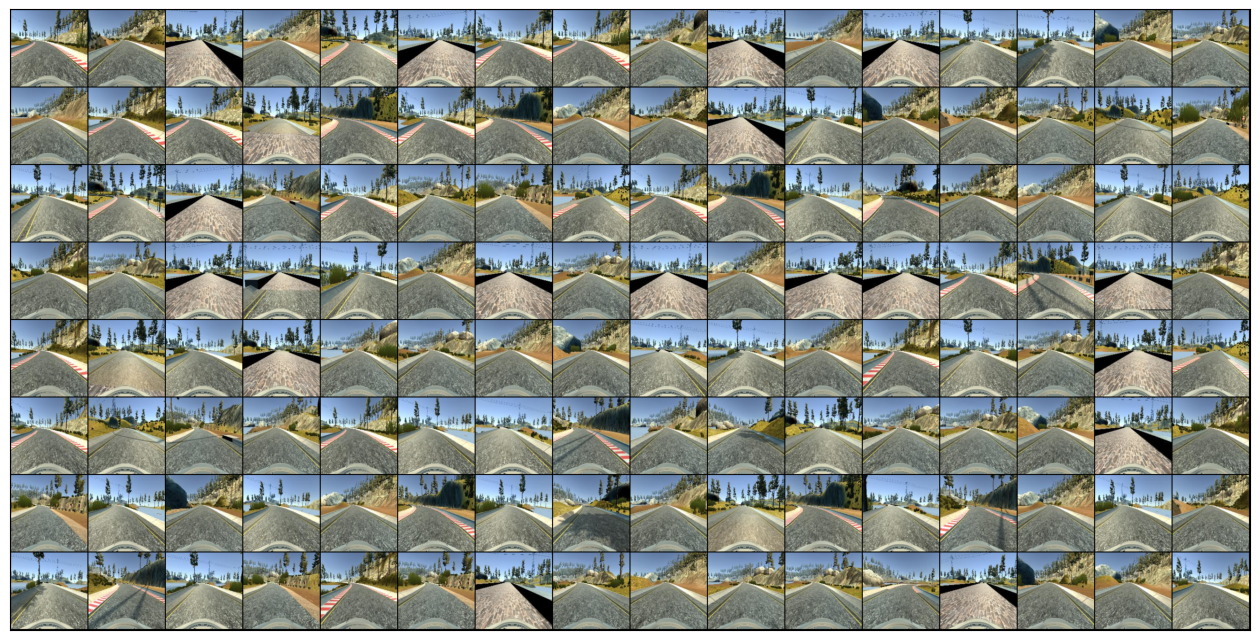

In [66]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)

What is pin memory and num worker  //
make preprocessing and add labels to data //
then build your model

## regression pipeline

In [4]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from skimage import io, transform
from torch.utils.data import random_split


#train and test data directory
data_dir = "/home/omar/Desktop/simulator-linux/training_data/"
test_data_dir = "/home/omar/Desktop/simulator-linux/test_data/"


In [5]:
class CarDataset(Dataset):

    def __init__(self, csv_file, root_dir, transform=None):
        self.csv = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.csv)

    def __getitem__(self, idx) :
        if torch.is_tensor(idx):
            idx = idx.tolist()

        image_name = os.path.join(self.root_dir,self.csv.iloc[idx,0])
        image  = io.imread(image_name)
        label = self.csv.iloc[idx,1:3]
        
        label = np.array(label , dtype = np.float32).reshape(-1, 2)

        sample = {'image':image , 'label':label}

        if self.transform:
            sample['image'] = self.transform(sample['image'])
            sample['label'] = torch.from_numpy(sample['label'])
        return sample




In [6]:
# This hand made transformation do not turn the image into float values which make problems in the training process 
# so we use the ToTensor() transformation from torchvision.transforms
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, label = sample['image'], sample['label']

        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.from_numpy(image),
                'label': torch.from_numpy(label)}
                

In [7]:
car_dataset = CarDataset(csv_file=data_dir + 'updated1_driving_log.csv',
                                    root_dir=data_dir + 'IMG/' , transform = transforms.ToTensor() )


x  = car_dataset[1400]['label']
print(x)




tensor([[0.5269, 0.0000]])


In [8]:
for i, sample in enumerate(car_dataset):
    print(i, sample['image'].shape, sample['label'].shape)

    if i == 3:
        break

0 torch.Size([3, 160, 320]) torch.Size([1, 2])
1 torch.Size([3, 160, 320]) torch.Size([1, 2])
2 torch.Size([3, 160, 320]) torch.Size([1, 2])
3 torch.Size([3, 160, 320]) torch.Size([1, 2])


Split data into validation and Training

In [9]:
batch_size = 40
val_size = int(0.2 * len(car_dataset))
train_size = len(car_dataset) - val_size 

train_data,val_data = random_split(car_dataset,[train_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")


Length of Train Data : 1657
Length of Validation Data : 414


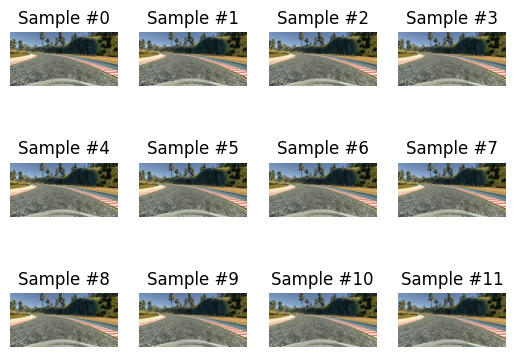

In [10]:
fig = plt.figure()

for i, sample in enumerate(car_dataset):
    image, label = sample['image'], sample['label']
    ax = plt.subplot(3, 4, i + 1)
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')

    # Check the current shape of the image tensor (C x H x W)
    image = image.permute(1, 2, 0)  # Transpose (C x H x W) to (H x W x C)

    plt.imshow(image)

    if i == 11:
        plt.show()
        break


In [11]:
def custom_collate(batch):
    images = [item['image'] for item in batch]
    labels = [item['label'] for item in batch]
    return {
        'image': torch.stack(images),
        'label': torch.stack(labels).squeeze()  # Remove the extra dimension
    }

# Create the DataLoader with the custom collate function
trainloader = DataLoader(train_data, batch_size=40, shuffle=True, num_workers=4, collate_fn=custom_collate)
val_loader = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True , collate_fn=custom_collate)

In [12]:
x = next(iter(trainloader))
print(x['label'].shape)

for i, sample in enumerate(trainloader):
    print(sample['label'])

    if i == 3:
        break


torch.Size([40, 2])
tensor([[ 0.0000,  0.0000],
        [-0.6270,  1.0000],
        [ 0.0000,  1.0000],
        [ 0.0000,  0.0241],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.2065,  0.0000],
        [-0.1952,  1.0000],
        [ 0.0000,  1.0000],
        [ 0.2431,  0.0000],
        [ 0.0000,  1.0000],
        [ 0.0000,  0.0000],
        [-0.1127,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  1.0000],
        [ 0.0000,  0.0000],
        [ 0.0656,  0.1489],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  1.0000],
        [ 0.3339,  0.0000],
        [ 0.0000,  0.0656],
        [ 0.0000,  0.2753],
        [ 0.0000,  0.5296],
        [ 0.1238,  0.0000],
        [ 0.0000,  1.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  1.0000],
        [ 0.0000,  0.2370],
        [-0.0934,  0.0000],
        [ 0.0000,  1.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [-0.1329,  0.3578],
        [-0.3600,  0.3600],


Model arc

In [13]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary

In [14]:
class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        # Define your CNN layers here
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.conv2 = nn.Conv2d(32, 64 , 3)
        self.conv3 = nn.Conv2d(64, 128 , 3)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(87552, 128)   
        self.fc2 = nn.Linear(128, 2) 


    def forward(self, x):
        # Define the forward pass of your CNN
        out = self.conv1(x)
        out = F.elu(out)
        out = self.pool(out)
        out = self.dropout1(out)
        out = self.conv2(out)
        out = F.elu(out)
        out = self.pool(out)
        out = self.dropout1(out)
        out = self.conv3(out)
        out = F.elu(out)
        out = self.pool(out)
        out = self.dropout2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.dropout2(out)
        out = self.fc2(out)

        return out

In [15]:
# Initialize your CNN model
model = MyCNN()
summary(model, (3, 320, 160))


/home/omar/Desktop/simulator-linux/sim-3.9/lib/python3.9/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 318, 158]             896
         MaxPool2d-2          [-1, 32, 159, 79]               0
           Dropout-3          [-1, 32, 159, 79]               0
            Conv2d-4          [-1, 64, 157, 77]          18,496
         MaxPool2d-5           [-1, 64, 78, 38]               0
           Dropout-6           [-1, 64, 78, 38]               0
            Conv2d-7          [-1, 128, 76, 36]          73,856
         MaxPool2d-8          [-1, 128, 38, 18]               0
           Dropout-9          [-1, 128, 38, 18]               0
           Linear-10                  [-1, 128]      11,206,784
          Dropout-11                  [-1, 128]               0
           Linear-12                    [-1, 2]             258
Total params: 11,300,290
Trainable params: 11,300,290
Non-trainable params: 0
-------------------------

training

In [16]:
import os

# Define a directory to save checkpoints
checkpoint_dir = 'checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

num_epochs = 50

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    model.train()
    for i, sample in enumerate(trainloader):  # Assuming 'train_dataloader' for training data
        optimizer.zero_grad()
        outputs = model(sample['image'])
          
        loss = criterion(outputs, sample['label'])
        loss.backward()
        optimizer.step()

    # Validation loop (evaluate on validation data)
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    with torch.no_grad():  # Disable gradient computation during validation
        for sample in val_loader:  # Assuming 'val_dataloader' for validation data
            outputs = model(sample['image'])
            val_loss += criterion(outputs, sample['label']).item()

    # Calculate and print average validation loss
    avg_val_loss = val_loss / len(val_loader)  # Calculate the average loss
    print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch + 1, float(loss), float(avg_val_loss)))

    # Save the checkpoint (model state, optimizer state, and epoch) after each epoch
    checkpoint_filename = os.path.join(checkpoint_dir, 'checkpoint_epoch_{}.pt'.format(epoch + 1))
    torch.save({
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss,
        'val_loss': avg_val_loss,
    }, checkpoint_filename)


Epoch: 1, Training Loss: 1.8177, Validation Loss: 68.9560
Epoch: 2, Training Loss: 0.2844, Validation Loss: 38.8420
Epoch: 3, Training Loss: 0.0954, Validation Loss: 39.0619
Epoch: 4, Training Loss: 0.1534, Validation Loss: 37.5939
Epoch: 5, Training Loss: 0.1190, Validation Loss: 37.7178
Epoch: 6, Training Loss: 0.1135, Validation Loss: 35.6783
Epoch: 7, Training Loss: 0.1424, Validation Loss: 34.5602
Epoch: 8, Training Loss: 0.1559, Validation Loss: 34.0779
Epoch: 9, Training Loss: 0.1119, Validation Loss: 32.3682
Epoch: 10, Training Loss: 0.1296, Validation Loss: 28.0050
Epoch: 11, Training Loss: 0.2065, Validation Loss: 28.1901
Epoch: 12, Training Loss: 0.1231, Validation Loss: 26.1726
Epoch: 13, Training Loss: 0.1660, Validation Loss: 24.4271
Epoch: 14, Training Loss: 0.1082, Validation Loss: 24.5685
Epoch: 15, Training Loss: 0.1730, Validation Loss: 22.2390
Epoch: 16, Training Loss: 0.0777, Validation Loss: 21.9544
Epoch: 17, Training Loss: 0.0843, Validation Loss: 21.9415
Epoch:

loading checkpoint and getting model.pth file

In [17]:
import torch
import torch.nn as nn


In [ ]:
checkpoint_path = 'path/to/your/checkpoint_epochX.pt'
checkpoint = torch.load(checkpoint_path)
